[Table of Contents](table_of_contents.ipynb)

# Topic 24.  Singular Value Decomposition
Author: Brendon Forsgren (bforsgren29@gmail.com)

Text recognition HW problem: Jon Knight (jknight7027@yahoo.com)
    

##  Introduction
Singualar Value Decomposition (SVD) is a matrix decomposition for any complex matrix that results in 2 unitary matrices and a diagonal matrix of singular values. The SVD is a generalization of Eigenvalue Decomposition and is valid for any complex matrix, not just square matrices.

The SVD is one of the most important techniques in Linear Algebra (to the point that it could be called a power tool!) and for good reason. The SVD provides a robust solution to Least Squares and Min-Norm problems. Additionally it allows for a robust solution for ill conditioned problems (problems where the condition number of the A matrix is very high) to be computed. Lastly, while many matrix decompositions have certain requirements about the matrix being decomposed,LU: square and full rank, Cholesky: square, full rank, and symetric positive definite, Eigenvalue Decomposition: square and algebraic multiplicity must equal geometric multiplicity ($m_i = q_i$). SVD has no such requirements.

## Explanation of the theory

As mentioned above, the SVD is a generalization of the decomposition $A=S\Lambda S^{-1}$ also known as the Eigenvalue Decomposition. The SVD extends this to be the following decomposition for any complex $m\times n$ matrix:
\begin{align*}
A = U\Sigma V^H
\end{align*}
where $U \in \mathbb{C}^{m\times m}$ and unitary, $V \in \mathbb{C}^{n\times n}$ and unitary, and $\Sigma \in \mathbb{R}^{m \times n}$ and diagonal. $\Sigma$ is also filled with Singular Values $\sigma_i$ such that $\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_p \geq 0$ where p = min(m, n). $\Sigma$ is a rectangular matrix and as a result $\Sigma$ is diagonal along the main diagonal with the remaining rows or columns being fille with zeros as shown below.
\begin{align*}
\Sigma = \begin{pmatrix} \sigma_1 & 0 & 0 & 0 \\ 0 & \sigma_2 & 0 & 0 \\ 0 & 0 & \sigma_3 & 0 \end{pmatrix}\quad \textrm{or} \quad \Sigma = \begin{pmatrix} \sigma_1 & 0 & 0 \\ 0 & \sigma_2 & 0 \\ 0 & 0 & \sigma_3 \\ 0 & 0 & 0 \end{pmatrix}
\end{align*}

An interesting property of the singular values in $\Sigma$ is that they are the squareroot of the eigenvalues of $A^HA$ and $AA^H$ or $\sigma_i = \sqrt{\lambda_i}$. This is shown by the following: 
\begin{align*}
A^HA = V\Sigma^H U^H U \Sigma V^H\\
A^HA = V\Sigma^H I \Sigma V^H\\
A^HA = V\Sigma^H \Sigma V^H\\
\textrm{Let} \quad \Sigma^H \Sigma = \Lambda\\
A^HA = V \Lambda V^H
\end{align*}
Now multiplying each side on the right by $V$ gives us 
\begin{align*}
A^HAV = V \Lambda
\end{align*}
which is the definition of an eigenvalue and eigenvector pair. Therefore the eigenvalues ($\lambda$) of $A^HA$ are the square of the singular values ($\sigma$) of A. The same process can be repeated with the matrix $AA^H$ to obtain the same result Additionally it should be noted that in the case that A is a square symmetric matrix the SVD of A becomes equivalent to the Eigenvalue Decomposition and $\sigma_i = \lambda_i$.

Often it is convenient to use the following block matrix structure to write the SVD.
\begin{align*}
A = \begin{pmatrix} U_1 & U_2 \end{pmatrix} \begin{pmatrix} \Sigma_1 & 0 \\ 0 & \Sigma_2 \end{pmatrix} \begin{pmatrix} V_1^H \\ V_2^H \end{pmatrix}
\end{align*}
Where $U_1 \in \mathbb{C}^{m\times r}$,
$U_2 \in \mathbb{C}^{m \times (m-r)}$,
$V_1^H \in \mathbb{C}^{r \times n}$,
$V_2^H \in \mathbb{C}^{(n-r) \times n}$,
$\Sigma_1 = diag(\sigma_1, ... , \sigma_r)$,
and $\Sigma_1 \in \mathbb{R}^{r\times r}$ and $\Sigma_2 \in \mathbb{R}^{(m-r) \times (m-r)}$ with all singular values equaling 0. This allows A to be written in the following format in terms of the non-zero singular values. \begin{align*}
A = U_1 \Sigma_1 V_1^H = \Sigma_{i=1}^r \sigma_i u_i v_i^H
\end{align*}
This will be useful when finding solutions to equations in the form $Ax=b$ when $A$ is rank deficient.

## Simple Numerical Examples

As mentioned above the SVD has numerous applications to solving the problem $Ax = b$. In this section I will show some examples of how the matrix rank relates to the SVD, how to find the pseudo-inverse of matrix A using the SVD, and how to solve poorly conditioned problems using SVD.

The first example deals with the rank of matrix $A$. Simply put the rank of $A$ is equal to the number of non-zeros singular values (the rank of $\Sigma$). This can simply be shown using the following proof: \begin{align*}
A = U \Sigma V^H\\
rank(A) = rank(U \Sigma V^H)\\
\end{align*}
Since $U$ and $V^H$ are unitary they do not affect the rank of $\Sigma$.Therefore \begin{align*}
rank(A) = rank(\Sigma)
\end{align*}
The following python codes illustrates this.

In [20]:
import numpy as np
import scipy.linalg as spl
import numpy.linalg as npl

def checkSingularValues(s):
    s[s<1e-10] = 0
    return s

# For a random matrix
A = np.random.randint(-10, 10, size=(4, 5))
U, s, Vh = spl.svd(A)
s = checkSingularValues(s)
print('A:', A)
print('The numer of non-zero singular values in A is:', np.count_nonzero(s))
print('The rank of A is:', npl.matrix_rank(A))

# For a rank deficient matrix
B = np.array([[2, 7, -7, 4, -15], [12, 2, -3, -17, 6], [4, 14, -14, 8, -30], [36, 6, -9, -51, 18], [1, 3.5, -3.5, 2, -7.5]])
U, s, Vh = spl.svd(B)
print('B:', B)
s = checkSingularValues(s)
print('The numer of non-zero singular values in B is:', np.count_nonzero(s))
print('The rank of B is:', npl.matrix_rank(B))


('A:', array([[  3,  -6,   7,   1,   8],
       [-10,  -5,   2,  -1,   4],
       [  1,  -9,  -5,   1,  -2],
       [ -5,   0,  -1,   1,  -7]]))
('The numer of non-zero singular values in A is:', 4)
('The rank of A is:', 4)
('B:', array([[  2. ,   7. ,  -7. ,   4. , -15. ],
       [ 12. ,   2. ,  -3. , -17. ,   6. ],
       [  4. ,  14. , -14. ,   8. , -30. ],
       [ 36. ,   6. ,  -9. , -51. ,  18. ],
       [  1. ,   3.5,  -3.5,   2. ,  -7.5]]))
('The numer of non-zero singular values in B is:', 2)
('The rank of B is:', 2)



The next example will show how to compute the pseudo inverse using SVD. This can be done for both full rank and rank deficient matrices. The following derivation shows how to find the pseudo inverse for a full rank, tall matrix. 
\begin{align*}
A = \begin{pmatrix} U_1 & U_2 \end{pmatrix} \begin{pmatrix} \Sigma_1 \\ 0 \end{pmatrix} V^H = U_1 \Sigma_1 V^H\\
(A^HA)^{-1}A^H = (V \Sigma_1 U_1^H U_1 \Sigma_1 V^H)^{-1}V \Sigma_1 U^H\\
(A^HA)^{-1}A^H = (V \Sigma_1 \Sigma_1 V^H)^{-1}V \Sigma_1 U^H\\
(A^HA)^{-1}A^H = V \Sigma_1^{-1} \Sigma_1^{-1} V^H V \Sigma_1 U^H\\
(A^HA)^{-1}A^H = V \Sigma_1^{-1} U^H\\
\textrm{Where} \quad \Sigma_1^{-1} = diag(1/\sigma_1, 1/\sigma_2,..., 1/\sigma_r)
\end{align*}
To extend this to a rank deficient matrix simply get rid of all the singular values equal to 0 and the columns in $U$ and rows in $V^H$ corresponding to those values. The following code has and example finding the pseudo inverse for a tall matrix.

In [19]:
def invertSingularValues(s):
    index = np.nonzero(s)
    s[index] = 1.0/s[index]
    return s

# Tall matrix case
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [2, 6, 5]])
b = np.array([3, -5, 9, 10]).T
U, s, Vh = spl.svd(A)

s = checkSingularValues(s)
s = invertSingularValues(s)

S = np.diag(s)
S = np.hstack((S, np.zeros((3, 1))))
SVD_inv = np.dot(np.dot(Vh.T, S), U.T)
x_svd = np.dot(SVD_inv, b)

A_inv = npl.pinv(A)
x = np.dot(A_inv, b)
print('x_svd:', x_svd)
print('x:', x)


('x_svd:', array([-0.26666667,  4.2       , -2.93333333]))
('x:', array([-0.26666667,  4.2       , -2.93333333]))


This example is for a fat matrix. The reader is encouraged to perform the derivation above for a fat matrix.

In [17]:
A = np.array([[1, 2, 3, 4], [5, 4, 3, 2], [-1, 6, -2, 3]])
b = np.array([2, 6, -3]).T
U, s, Vh = spl.svd(A)

s = checkSingularValues(s)
s = invertSingularValues(s)

S = np.diag(s)
S = np.vstack((S, np.zeros((1, 3))))
svd_inv = np.dot(np.dot(Vh.T, S), U.T)
x_svd = np.dot(svd_inv, b)

A_inv = npl.pinv(A)
x = np.dot(A_inv, b)
print('x_svd:', x_svd)
print('x:', x)


('x_svd:', array([ 0.94444444, -0.05555556,  0.61111111, -0.16666667]))
('x:', array([ 0.94444444, -0.05555556,  0.61111111, -0.16666667]))


This example is for a rank deficient matrix.

In [16]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [2, 4, 6]])
b = np.array([3, -5, 9, 10]).T
U, s, Vh = spl.svd(A)
r = npl.matrix_rank(A)

s = checkSingularValues(s)

S = np.diag(s)
U1 = U[:, 0:r] # Here we get rid of the parts pertaining to the 0 singular values
S1 = S[0:r, 0:r]
V1h = Vh[0:r, :]

print('U1*S1*V1h:', np.dot(np.dot(U1, S1), V1h))
S1 = npl.inv(S1)
svd_inv = np.dot(np.dot(V1h.T, S1), U1.T)
x_svd = np.dot(svd_inv, b)

x = np.dot(npl.pinv(A), b)
print('x_svd:', x_svd)
print('x:', x)


('U1*S1*V1h:', array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.],
       [2., 4., 6.]]))
('x_svd:', array([-1.67521368,  0.04273504,  1.76068376]))
('x:', array([-1.67521368,  0.04273504,  1.76068376]))


As can be seen for the 3 examples above, the SVD provides a robust means of finding the pseudo inverse of a matrix in order to solve least squares, and min-norm problems


Now we will discuss how the SVD can be used to solve poorly conditioned problems. A matrix is poorly conditioned when two of the rows in the matrix become almost parallel. The sigular values in the SVD identify the direction of in which the problem is poorly conditioned. The direction of sensitivity are identified by the singular values that are very small. Therefore, to better condition a problem all that we need to do is identify very small singular values, discard them by setting them equal to 0, and then solve like we did the rank deficient problem. The follow code illustrates how this.

In [12]:
def checkSingularValues(s, val):
    s[s<val] = 0
    return s

A = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]])
print('K(A): ', npl.cond(A))
b1 = np.array([10, 14, 15]).T
b2 = b1 + np.array([.1, -.13, 0.5]).T

U, s, Vh = spl.svd(A)
print('s: ', s)

# Keeping all of the singular values
s1 = invertSingularValues(s)
S = np.diag(s1)
temp = np.dot(np.dot(Vh.T, S), U.T)
x1_b1 = np.dot(temp, b1)
x1_b2 = np.dot(temp, b2)
print('x1_b1: ', x1_b1)
print('x1_b2: ', x1_b2)

# Removing singular values less than 1e-10
s2 = checkSingularValues(s, 1e-10)
s2 = invertSingularValues(s2)
S = np.diag(s2)
temp = np.dot(np.dot(Vh.T, S), U.T)
x2_b1 = np.dot(temp, b1)
x2_b2 = np.dot(temp, b2)
print('x2_b1: ', x2_b1)
print('x2_b2: ', x2_b2)

# Remove all singular values less than 1
s3 = checkSingularValues(s, 1)
s3 = invertSingularValues(s3)
S = np.diag(s3)
temp = np.dot(np.dot(Vh.T, S), U.T)
x3_b1 = np.dot(temp, b1)
x3_b2 = np.dot(temp, b2)
print('x3_b1: ', x3_b1)
print('x3_b2: ', x3_b2)

# Compare with pinv
A_inv = npl.pinv(A)
print('x_pinv_b1:', np.dot(A_inv, b1))
print('x_pinv_b2:', np.dot(A_inv, b2))


('K(A): ', 3.224405992534971e+16)
('s: ', array([9.62347538e+00, 6.23475383e-01, 2.98457310e-16]))
('x1_b1: ', array([ 1.67528147e+15, -3.35056294e+15,  1.67528147e+15]))
('x1_b2: ', array([ 1.19503411e+15, -2.39006823e+15,  1.19503411e+15]))
('x2_b1: ', array([ 83., 122., 161.]))
('x2_b2: ', array([ 84.34, 123.81, 163.28]))
('x3_b1: ', array([0.90807556, 1.31937423, 1.73067291]))
('x3_b2: ', array([0.92139029, 1.33871967, 1.75604904]))
('x_pinv_b1:', array([-1.91666667,  0.83333333,  3.58333333]))
('x_pinv_b2:', array([-1.62833333,  0.9       ,  3.42833333]))


As can be seen removing the small singular values gives a more robust solution meaning that for small changes in the vector $b$, there are small changes in $x$.


## An Engineering Application

One application of the SVD of a matrix that is pretty cool is that a form of image compression can be done using the SVD. A picture (we will assume a gray scale) is an $r = m \times n$ matrix that will have $min(m, n)$ singular values.The information that comprises the picture is stored in the singular values and the vectors associated with each singular value.The amount of information in associated by the following equation: $ \%info = \frac{\sigma_i}{\sum_{j=0}^{r} \sigma_j}$
This means that we can reconstruct the image using $p$ singular values where $p <= r$. This means that if image $A = U \Sigma V^H$that $U\in \mathbb{C}^{m \times p}$, $\Sigma \in \mathbb{R}^{p \times p}$, and $V^H \in \mathbb{C}^{p \times n}$. The following example in code will take a $500 \times 877$ image of a tiger and compress it using a certain number of singular values. Using those singular values I will reconstruct the image and see how different it looks due to the information that was lost. The first plot will show what percentage of the information is retained if all singular values up to that singular value are used. The remaining plots will show the reconstructed image using the number of singular values in the plot title. 

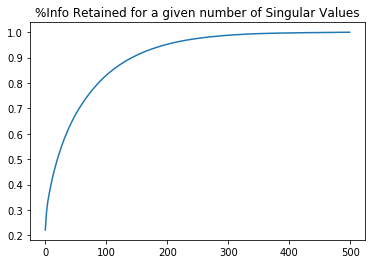

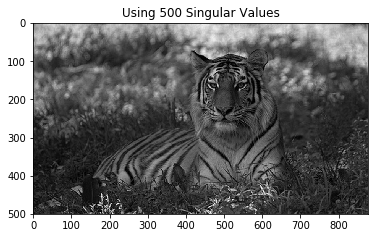

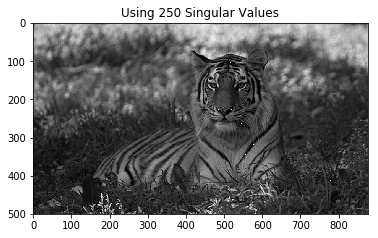

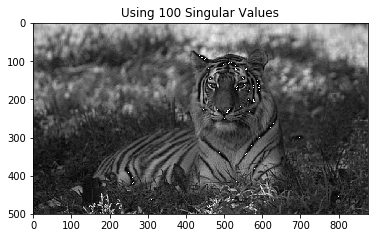

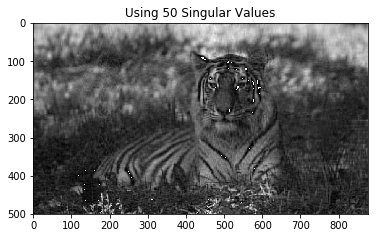

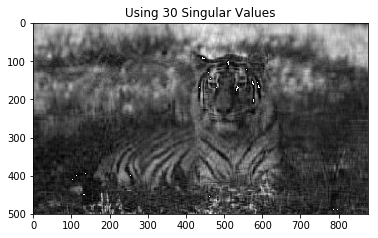

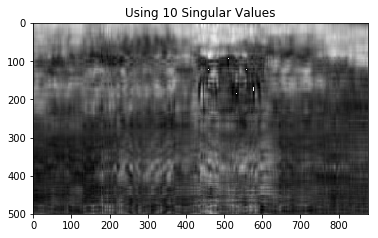

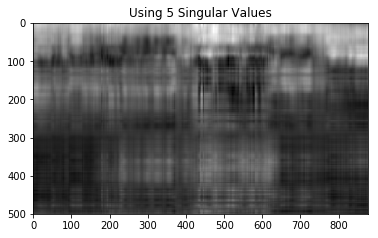

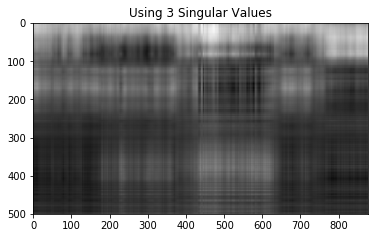

In [21]:
import numpy as np
import scipy.linalg as spl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread('tiger.jpg')
g_img = np.dot(img[..., :3], np.array([0.299, 0.597, 0.114]))  # Convert the image to gray scale

U, s, Vh = spl.svd(g_img)

plt.figure(1)
plt.plot(np.cumsum(s)/np.sum(s))
plt.title('%Info Retained for a given number of Singular Values')

num_values = [500, 250, 100, 50, 30, 10, 5, 3]

for i in range(len(num_values)):
    S = s[0:num_values[i]]
    Sigma = np.diag(S)
    U1 = U[:, 0:num_values[i]]
    Vh1 = Vh[0:num_values[i], :]
    temp = np.dot(np.dot(U1, Sigma), Vh1)
    
    img_approx = np.zeros_like(img)
    img_approx[:,:,0] = temp
    img_approx[:,:,1] = temp
    img_approx[:,:,2] = temp
    
    title = 'Using ' + str(num_values[i]) + ' Singular Values'
    plt.figure(i+2)
    plt.imshow(img_approx)
    plt.title(title)


The results of the code are pretty cool. From the first plot we can see that about 80% of the information is encoded in the first 20% of the singular values. Also we can see from the images that it is hard to notice a lack of detail in the images until less than 100 singular values are used and the quality of the images only starts decreasing rapidly when less than 50 singular values are used.

## Homework Problem

### Background
Another application of SVD is text classification. As in the example above, the SVD contains information about an image. Information on the structure of a character can be found by computing the SVD of training data. This information is then compared to an image of character to which character it is. This is a strategy used for OCR (optical character recognition) in the real world, for example, reading the post code on envelopes. The following exercise will guide you through a simple example of character recognition.


### Other information
The .mat file below contains a few matrices used for this exercise. Each column of the matrices number6training, number6testing, and allnumstesting all contain 256 pixel values rearranged from a 16x16 pixel image of a handwritten character. The images contained in number6training and number6testing are of the numeral '6'. The matrix allnumstesting contains images for all digits 0-9. The vector allnumsindex contains which number is in the corresponding column of allnumstesting. Use the first few singular vectors from the SVD of number6training to form a set of basis vectors. Use these basis vectors to classify whether characters from number6testing and allnumstesting are a 6 or not. (Hint: the error of a least squares approximation can determine how well the image fits the basis vectors.

### .mat file:
[textrecognition.mat](files/textrecognition.mat)

In [ ]:
#Starter code
import numpy as np
import scipy.io as sio

##Load .mat contents into variables
mat_contents = sio.loadmat('textrecognition.mat')
A = mat_contents['number6training'];
B = mat_contents['number6testing'];
allnums = mat_contents['allnumstesting'];
allindex = mat_contents['allnumsindex'];

U, S, V = np.linalg.svd(A);

#Your code here
#First form a set of basis vectors from the singular vectors
#Then compare images to this set of basis vectors (Hint: use error vector of least squares)

In [ ]:
#Helper function to display a column vector as an image
import numpy as np
import matplotlib.pyplot as plt
#Takes a vector of length 256 and displays as 16x16 image
def showimage(image):
    image = image.reshape(16,16);
    plt.imshow(image);

### Notes
Some of the characters will probably be classified wrong. Some of the characters are written badly and so will wrongly fall above or below the chosen threshold for the error.
A more complete implementation of character recognition would find basis vectors for each numeral and find which set of basis vectors fit an image the best. This can be left as a further exercise for those interested.